In [4]:
%cd /home/dongmin/23FW-NCG/jeongganbo-omr
%load_ext autoreload
%autoreload 2

/home/dongmin/userdata/jeongganbo-omr
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from pathlib import Path
import glob
import cv2

from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np

from exp_utils import get_img_paths

# Load ext files and paths

In [6]:
img_sub_path = 'notes'

img_path_base = Path('test/synth/raw/')
img_raw_ext = '.png'

img_path = img_path_base / img_sub_path

img_path_dict = { 
  str(path).split('/')[-1].replace('.png', ''): str(path) \
  for path in img_path.glob('*.png')
}

print([ name for name in img_path_dict.keys() ])

['hyeop_dd', 'hwang', 'hwang_ot', 'hyeop', 'ee_d', 'go', 'go_u', 'hyeop_d', 'eung', 'tae_dd', 'nam', 'lim_u', 'nam_u', 'joong_u', 'tae', 'tae_d', 'mu_dd', 'joong_dd', 'hwang_d', 'mu', 'lim_dd', 'go_d', 'nam_dd', 'mu_d', 'hwang_uu', 'hwang_u_ot', 'conti_002', 'hyeop_u', 'tae_u', 'joong', 'pause_001', 'lim_ddd', 'eung_d', 'ee_dd', 'hwang_dd_ot', 'joong_d', 'lim', 'hwang_d_ot', 'ee', 'nam_d', 'pause_003', 'pause_002', 'mu_u', 'lim_d', 'conti_001', 'hwang_u']


In [7]:
list(img_path_dict.items())[0]

('hyeop_dd', 'test/synth/raw/notes/hyeop_dd.png')

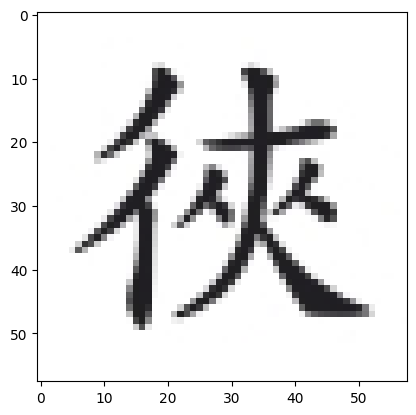

In [8]:
img = cv2.imread(list(img_path_dict.items())[0][1], cv2.IMREAD_UNCHANGED)

plt.imshow(img)

# pre-process imgs

## test: removing background
- 1st attempt: using threshold
- current attempt: by pixel color value

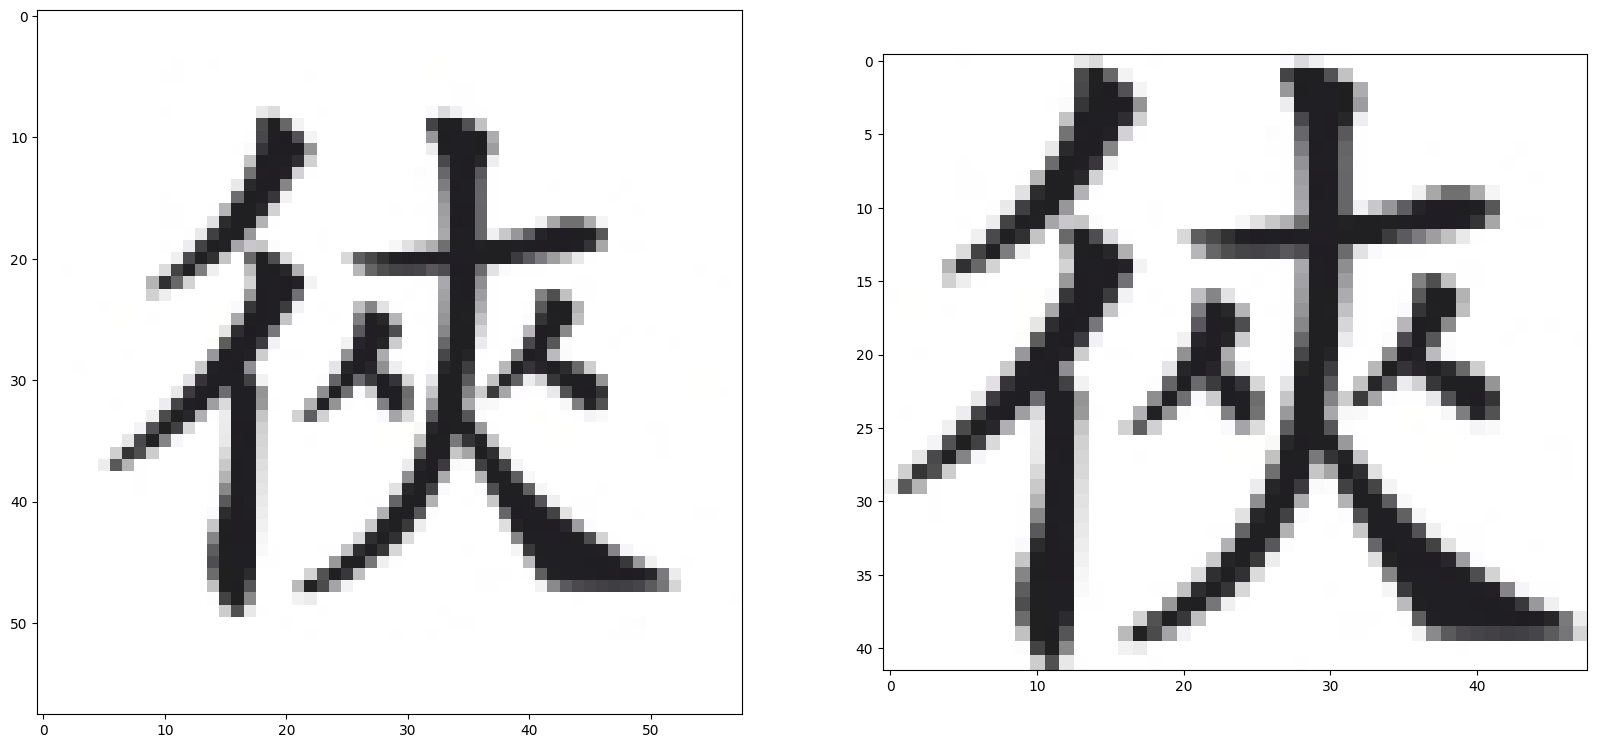

In [9]:
def crop_image(img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
  
  img_grey = 255 - cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
  
  slice_idxs = []
  
  for iter_num in range(4):
    target = np.transpose(img_grey, axes=(1, 0)) if iter_num > 1 else img_grey
      
    rng = range(len(target)) if iter_num % 2 == 0 else range(len(target) - 1, 0, -1)
    
    for idx in rng:
      arr = target[idx]
      p_sum = sum(arr)
      
      if p_sum > 10:
        slice_idxs.append(idx)
        break
  
  row_st, row_ed, col_st, col_ed = slice_idxs
  
  return img.copy()[row_st:row_ed+1, col_st:col_ed+1, :]


img = cv2.imread(list(img_path_dict.items())[0][1], cv2.IMREAD_UNCHANGED)
img_cp = crop_image(img)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2, facecolor="0")
plt.imshow(img_cp, interpolation='none')

plt.show()

## remove background from all pitch char imgs (Done)

In [10]:
base_path = Path('test/synth/src') / img_sub_path

def crop_image_and_save(name, p, base):
  img = cv2.imread(p, cv2.IMREAD_UNCHANGED)
  img_crop = crop_image(img)
  cv2.imwrite(str(base / f'{name}.png'), img_crop)

for note_name, path in img_path_dict.items():
  crop_image_and_save(note_name, path, base_path)

In [9]:
name = 'neunireu_001'

p = f'test/synth/raw/symbols/{name}.png'

img = cv2.imread(p, cv2.IMREAD_UNCHANGED)
img_crop = crop_image(img)
cv2.imwrite(f'test/synth/src/symbols/{name}.png', img_crop)

True

# Jng Size Stats

## Jng ratio histogram

In [6]:
jng_img_dir = 'test/split_pngs'
jng_img_paths = sorted(glob.glob(f'{jng_img_dir}/*.png'))

width = []
height = []

for path in tqdm(jng_img_paths, leave=False):
  h, w, _ = cv2.imread(path).shape
  width.append(w)
  height.append(h)

ratio = [ round(h/w, 1) for w, h in zip(width, height)]

<BarContainer object of 15 artists>

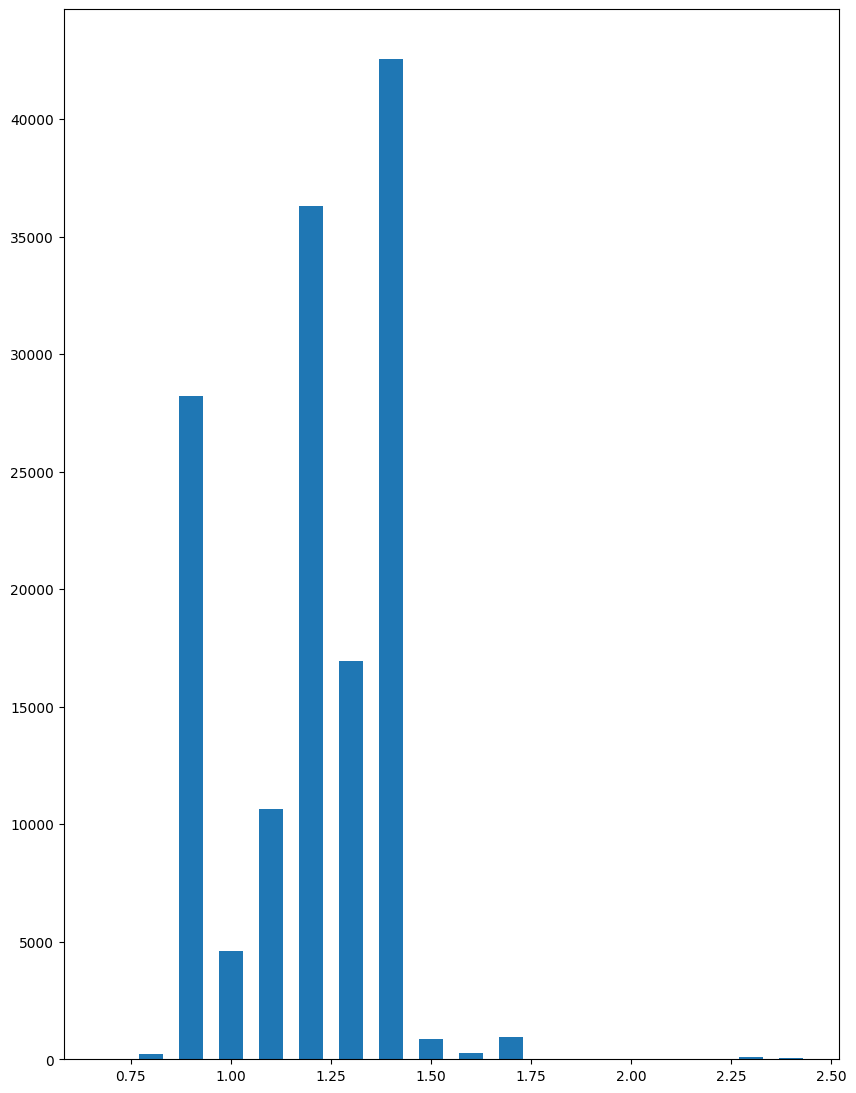

In [8]:
from collections import Counter

ratios = (ratio)
widths = Counter(width)

plt.figure(figsize=(10, 30))

plt.subplot(2, 1, 1)
plt.bar(ratios.keys(), ratios.values(), 0.06)

In [10]:
ratio_tups = [ (r, c) for r, c in ratios.items() ]

ratio_tups.sort(key = lambda x: x[0], reverse=True)

ratio_tups

[(2.4, 46),
 (2.3, 95),
 (2.2, 11),
 (1.8, 8),
 (1.7, 945),
 (1.6, 268),
 (1.5, 852),
 (1.4, 42542),
 (1.3, 16963),
 (1.2, 36281),
 (1.1, 10659),
 (1.0, 4627),
 (0.9, 28200),
 (0.8, 224),
 (0.7, 17)]

## Jng width histogram

<BarContainer object of 18 artists>

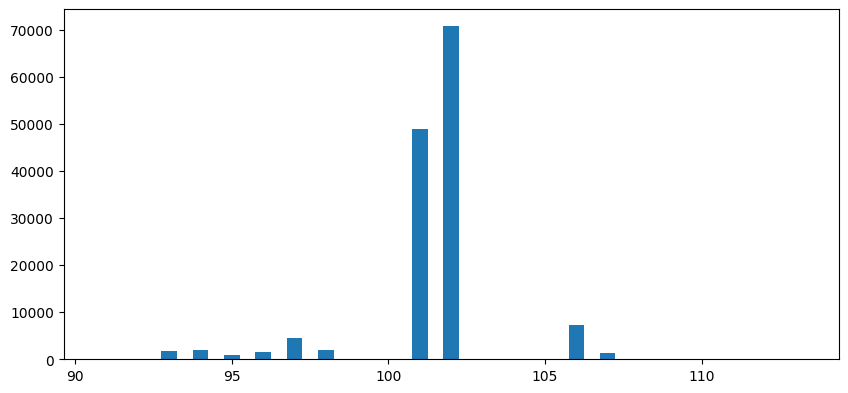

In [9]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.bar(widths.keys(), widths.values(), 0.5)

In [27]:
width_tups = [ (w, c) for w, c, in widths.items() ]
width_tups.sort(key=lambda x: x[0], reverse=True)

width_tups, sum([ w for w, _ in width_tups])/len(width_tups)

([(113, 24),
  (112, 48),
  (107, 1361),
  (106, 7332),
  (105, 59),
  (104, 125),
  (103, 96),
  (102, 70787),
  (101, 49007),
  (100, 102),
  (99, 11),
  (98, 2034),
  (97, 4464),
  (96, 1546),
  (95, 941),
  (94, 1989),
  (93, 1680),
  (91, 132)],
 100.88888888888889)

## Jeonggan Width/Height histogram

In [4]:
jng_img_dir = 'test/split_pngs'
jng_img_paths = sorted(glob.glob(f'{jng_img_dir}/*.png'))

size_list = []

for path in tqdm(jng_img_paths, leave=False):
  h, w, _ = cv2.imread(path).shape
  size_list.append((w, h))

In [22]:
len(jng_img_paths)

141738

In [24]:
from collections import Counter

size_counter = Counter(size_list)

size_counter_sorted = sorted(size_counter.items(), key=lambda x: x[1], reverse=True)

size_counter_sorted

[((102, 139), 13698),
 ((102, 138), 12128),
 ((102, 91), 8147),
 ((101, 138), 6831),
 ((101, 91), 6688),
 ((102, 119), 6674),
 ((101, 139), 6626),
 ((101, 119), 6549),
 ((102, 120), 6536),
 ((101, 120), 5206),
 ((102, 137), 4929),
 ((102, 92), 4034),
 ((101, 92), 3180),
 ((102, 118), 3064),
 ((102, 108), 2955),
 ((106, 139), 2867),
 ((101, 108), 2859),
 ((101, 118), 2722),
 ((101, 137), 2078),
 ((106, 140), 1862),
 ((102, 107), 1604),
 ((102, 109), 1582),
 ((101, 109), 1124),
 ((106, 138), 1073),
 ((93, 91), 1004),
 ((97, 87), 943),
 ((101, 133), 930),
 ((97, 91), 869),
 ((106, 143), 850),
 ((96, 91), 775),
 ((102, 133), 760),
 ((101, 107), 740),
 ((98, 87), 632),
 ((107, 139), 630),
 ((97, 116), 627),
 ((97, 115), 589),
 ((102, 93), 542),
 ((102, 146), 498),
 ((94, 108), 478),
 ((93, 92), 478),
 ((94, 91), 459),
 ((102, 127), 441),
 ((97, 88), 430),
 ((97, 92), 413),
 ((107, 140), 390),
 ((102, 90), 382),
 ((101, 170), 360),
 ((102, 125), 344),
 ((101, 153), 343),
 ((106, 142), 342),


In [32]:
K = 100
sum(list(map( lambda x: x[1], size_counter_sorted[:K] ))) / len(jng_img_paths)

0.9773455248416092

In [33]:
list(map( lambda x: x[0], size_counter_sorted[:K] ))

[(102, 139),
 (102, 138),
 (102, 91),
 (101, 138),
 (101, 91),
 (102, 119),
 (101, 139),
 (101, 119),
 (102, 120),
 (101, 120),
 (102, 137),
 (102, 92),
 (101, 92),
 (102, 118),
 (102, 108),
 (106, 139),
 (101, 108),
 (101, 118),
 (101, 137),
 (106, 140),
 (102, 107),
 (102, 109),
 (101, 109),
 (106, 138),
 (93, 91),
 (97, 87),
 (101, 133),
 (97, 91),
 (106, 143),
 (96, 91),
 (102, 133),
 (101, 107),
 (98, 87),
 (107, 139),
 (97, 116),
 (97, 115),
 (102, 93),
 (102, 146),
 (94, 108),
 (93, 92),
 (94, 91),
 (102, 127),
 (97, 88),
 (97, 92),
 (107, 140),
 (102, 90),
 (101, 170),
 (102, 125),
 (101, 153),
 (106, 142),
 (96, 92),
 (98, 116),
 (98, 115),
 (95, 108),
 (101, 132),
 (98, 88),
 (102, 147),
 (102, 126),
 (101, 93),
 (101, 169),
 (97, 114),
 (102, 124),
 (102, 123),
 (102, 132),
 (101, 154),
 (107, 138),
 (94, 119),
 (94, 92),
 (101, 125),
 (101, 127),
 (95, 119),
 (94, 107),
 (102, 145),
 (101, 152),
 (94, 109),
 (101, 126),
 (102, 128),
 (95, 107),
 (98, 114),
 (101, 128),
 (96

# Img Random Exp

**memo**

* width
    * init width: 100
    * width noise: -10 ~ 13

* ratio
    * init ratio: 1.4
    * ratio noise: -0.7 ~ 1.0

### exp: size random noise 

widths:  [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]
ratios:  [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]


<BarContainer object of 18 artists>

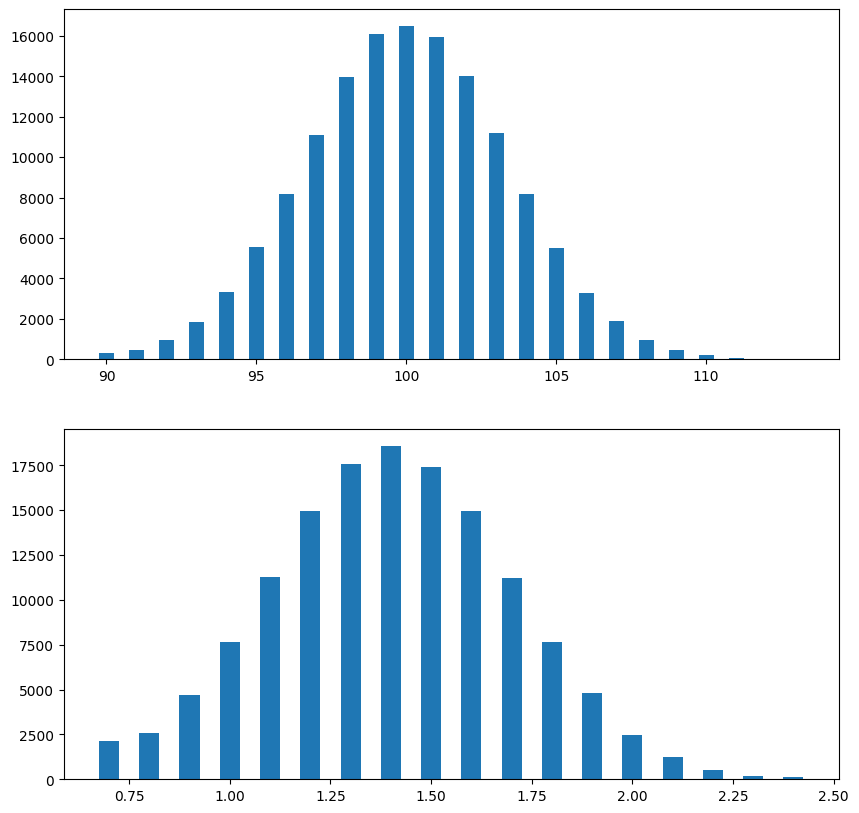

In [70]:
from collections import Counter

INIT_WIDTH = 100
WIDTH_NOISE_SIG = 3.34
WIDTH_NOISE_MIN = -10
WIDTH_NOISE_MAX = 13

INIT_RATIO = 1.4
RATIO_NOISE_SIG = 0.3
RATIO_NOISE_MIN = -0.7
RATIO_NOISE_MAX = 1.0

random_widths = Counter(map(lambda x: INIT_WIDTH + round(min(WIDTH_NOISE_MAX, max(WIDTH_NOISE_MIN, x))), np.random.normal(0, WIDTH_NOISE_SIG, 140000).tolist()))

random_ratios = Counter(
  map(
    lambda x: round(INIT_RATIO + min(RATIO_NOISE_MAX, max(RATIO_NOISE_MIN, x)), 1), 
    np.random.normal(0, RATIO_NOISE_SIG, 140000).tolist()
  )
)

print('widths: ', sorted(random_widths))
print('ratios: ', sorted(random_ratios))


plt.figure(figsize=(10, 10))

plt.subplot(2, 2, (1, 2))
plt.bar(random_widths.keys(), random_widths.values(), 0.5)

plt.subplot(2, 2, (3, 4))
plt.bar(random_ratios.keys(), random_ratios.values(), 0.05)